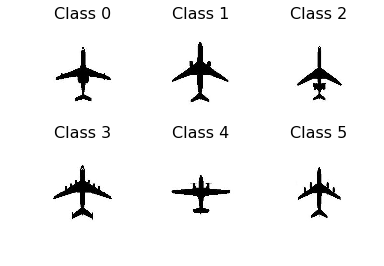

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

qtyTrainData = 5

# Print classes

for classNumber in range(0, 6):
    img_path = "../Data/aircraft-"+str(classNumber)+"/0.jpg"
    img = cv2.imread(img_path)
    plt.subplot(2, 3, classNumber+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Class " + str(classNumber), fontsize=16)

In [316]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def showConvexHull(hull, classNumber):
    points = []
    
    for contour in hull:
        for point in contour:
            if(point[0][0]!=0 and point[0][0]!=199 and point[0][1]!=0 and point[0][1]!=199):
                points.append([point[0][0], point[0][1]])
    
    indexhull = ConvexHull(points)
    #print(hull.simplices) #print indexes
    

    for simplex in indexhull.simplices:
        plt.plot([points[simplex[0]][0], points[simplex[1]][0]], [points[simplex[0]][1], points[simplex[1]][1]], 'r-')


In [342]:
def calcAreaAircraft(img):
    totalNumPixels = 40000
    numBlackPixels = 0
    cont = 0
    for i in thresh:
        for j in i:
            cont=cont+1
            if(j==0):
                numBlackPixels=numBlackPixels+1
                
    return numBlackPixels/totalNumPixels*100

In [378]:
import math

def calcAreaConvexhull(hull):
    points = []
    
    #----- Calculate convex hull points -----#
    for contour in hull:
        for point in contour:
            if(point[0][0]!=0 and point[0][0]!=199 and point[0][1]!=0 and point[0][1]!=199):
                points.append([point[0][0], point[0][1]])
    
    indexhull = ConvexHull(points)
    
    n = 0
    hullPoints = []

    for simplex in indexhull.simplices:
        hullPoints.append([points[simplex[0]][0], points[simplex[0]][1]])
        n=n+1
        
    
    #----- Sort points -----#
    angles = [None] * n
    for i in range(0, n):
        angles[i] = math.atan2(hullPoints[i][1], hullPoints[i][0]);

    for i in range(0, n):
        for j in range(i+1, n):
            if(angles[j]>angles[i]):
                tempAngle = angles[i]
                tempPoint = hullPoints[i]
                
                hullPoints[i] = hullPoints[j]
                angles[i] = angles[j]
                hullPoints[j] = tempPoint
                angles[j] = tempAngle
        
    area = 0.0
    # Calculate value of shoelace formula 
    j = n - 1
    for i in range(0,n): 
        area += (hullPoints[j][0] + hullPoints[i][0]) * (hullPoints[j][1] - hullPoints[i][1])
        j = i   # j is previous vertex to i 
      
    return abs(0.5*area/40000*100)
    

Class  0 AirCraft: 5.38 ConvexHull: 16.213749999999997
Class  0 AirCraft: 7.657500000000001 ConvexHull: 9.085
Class  0 AirCraft: 5.3675 ConvexHull: 0.92125
Class  0 AirCraft: 6.647500000000001 ConvexHull: 8.12875
Class  0 AirCraft: 6.4375 ConvexHull: 15.54625
Class  1 AirCraft: 6.404999999999999 ConvexHull: 18.275
Class  1 AirCraft: 9.2125 ConvexHull: 9.88875
Class  1 AirCraft: 6.425 ConvexHull: 0.31375000000000003
Class  1 AirCraft: 8.035 ConvexHull: 8.89
Class  1 AirCraft: 7.7725 ConvexHull: 17.7975
Class  2 AirCraft: 4.4475 ConvexHull: 11.02375
Class  2 AirCraft: 6.397500000000001 ConvexHull: 1.4275
Class  2 AirCraft: 4.4675 ConvexHull: 0.68375
Class  2 AirCraft: 5.5875 ConvexHull: 2.64125
Class  2 AirCraft: 5.385 ConvexHull: 3.2787499999999996
Class  3 AirCraft: 6.16 ConvexHull: 17.2875
Class  3 AirCraft: 8.790000000000001 ConvexHull: 9.59875
Class  3 AirCraft: 6.1675 ConvexHull: 0.9287500000000001
Class  3 AirCraft: 7.66 ConvexHull: 8.200000000000001
Class  3 AirCraft: 7.377499999

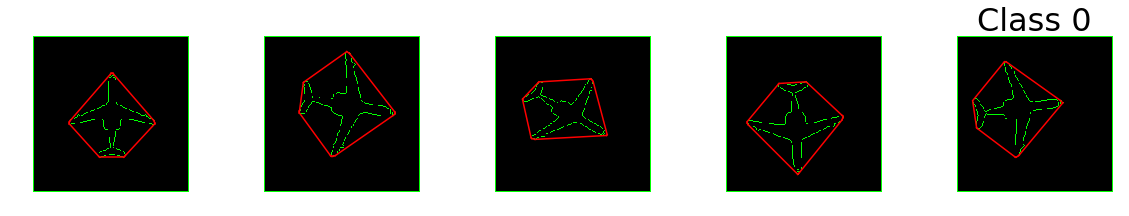

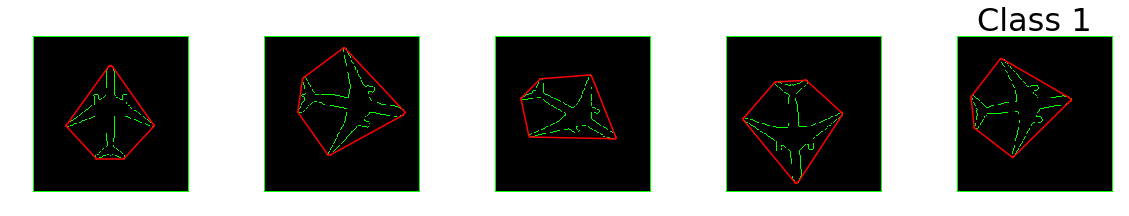

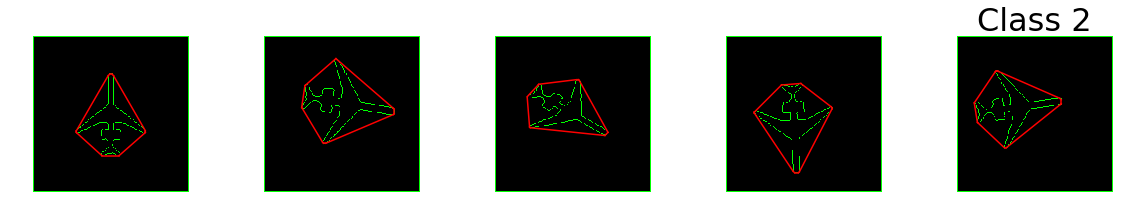

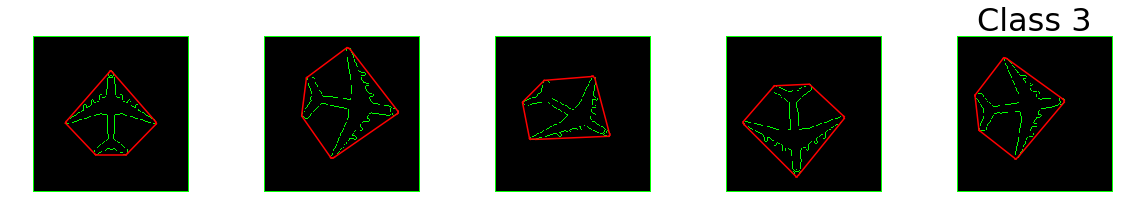

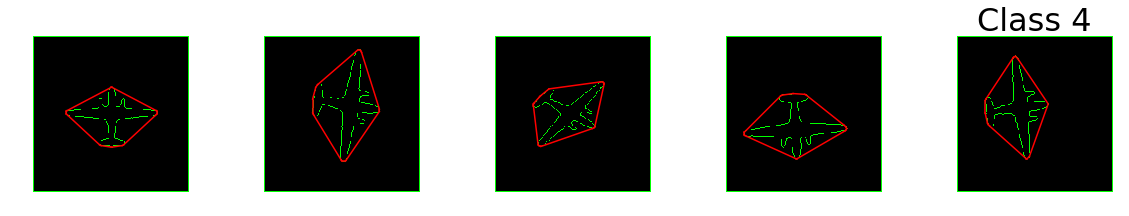

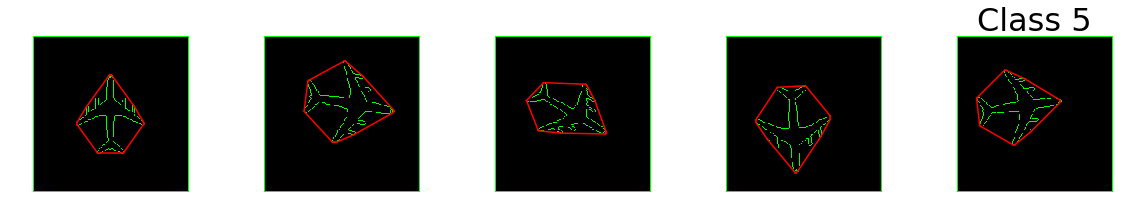

In [380]:
#----------- Write to outputFile -----------#
import csv

header = ['Class', ' AreaAirplane', ' AreaConvexHull']
with open('trainData.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(header)
csvFile.close() 
    
for classNumber in range(0, 6):
    plt.figure(classNumber, figsize=(20, 20))
    for trainDataNumber in range(0,qtyTrainData):
        img_path = "../Data/aircraft-"+str(classNumber)+"/"+str(trainDataNumber)+".jpg"
        img = cv2.imread(img_path)
        
        #----------- Generate Convex hull -----------#
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.blur(gray, (3, 3))
        #binarize the image
        ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
        # Finding contours for the binarized
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # create hull array for convex hull points
        hull = []
        convexityDefects = [] 

        # calculate points for each contour
        for i in range(len(contours)):
            # creating convex hull object for each contour
            hull.append(cv2.convexHull(contours[i], False))

        # create an empty black image
        drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

        
        # draw contours and hull points, and find convexity defects
        for i in range(len(contours)):
            color_contours = (0, 255, 0) # green - color for contours
            color = (255, 0, 0) # blue - color for convex hull
            # draw ith contour
            cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
            # draw ith convex hull object
            #cv2.drawContours(drawing, hull, i, color, 1, 8)
            
        #----------- Show data -----------#
        plt.subplot(6, qtyTrainData, trainDataNumber+1)
        showConvexHull(hull, classNumber)
        plt.imshow(drawing) # Uncommment this line to see the plane img
        plt.axis("off")
        
        #----------- Calculate areas -----------#
        
        areaAircraft = calcAreaAircraft(thresh)
        areaConvexhull = calcAreaConvexhull(hull)
        
        print("Class ", classNumber, "AirCraft:", areaAircraft, "ConvexHull:", areaConvexhull)
        #----------- Update output file -----------#
        row = [str(classNumber), str(areaAircraft), str(areaConvexhull)]
        with open('trainData.csv', 'a') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(row)
        
    plt.title("Class " + str(classNumber), fontsize=32)
    
csvFile.close() 